In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
import json
import apache_log_parser
from pprint import pprint
import os

In [2]:


line_parser = apache_log_parser.make_parser("%h %l %u %t \"%r\"")
test_data ='204.249.225.59 - - [28/Aug/1995:00:00:34 -0400] "GET /pub/rmharris/catalogs/dawsocat/intro.html HTTP/1.0" 200 3542'
log_line_data = line_parser(test_data)
pprint(log_line_data)

{'remote_host': '204.249.225.59',
 'remote_logname': '-',
 'remote_user': '-',
 'request_first_line': 'GET /pub/rmharris/catalogs/dawsocat/intro.html '
                       'HTTP/1.0',
 'request_http_ver': '1.0',
 'request_method': 'GET',
 'request_url': '/pub/rmharris/catalogs/dawsocat/intro.html',
 'request_url_fragment': '',
 'request_url_hostname': None,
 'request_url_netloc': '',
 'request_url_password': None,
 'request_url_path': '/pub/rmharris/catalogs/dawsocat/intro.html',
 'request_url_port': None,
 'request_url_query': '',
 'request_url_query_dict': {},
 'request_url_query_list': [],
 'request_url_query_simple_dict': {},
 'request_url_scheme': '',
 'request_url_username': None,
 'time_received': '[28/Aug/1995:00:00:34 -0400]',
 'time_received_datetimeobj': datetime.datetime(1995, 8, 28, 0, 0, 34),
 'time_received_isoformat': '1995-08-28T00:00:34',
 'time_received_tz_datetimeobj': datetime.datetime(1995, 8, 28, 0, 0, 34, tzinfo='0400'),
 'time_received_tz_isoformat': '1995-0

In [14]:
from typing import List

log_line_data = None
line_parser = apache_log_parser.make_parser("%h %l %u %t \"%r\"")
with open(f"{os.getcwd()}/clarknet_access_log_Aug28", mode='r') as f1:
    log_line_data = [line_parser(line) for line in f1.readlines()]


In [15]:
df_log_line_data = pd.DataFrame([{"date": df_line["time_received_datetimeobj"], "count": 1} for df_line in log_line_data])
df_log_line_data

,date,count
0,1995-08-28 00:00:34,1
1,1995-08-28 00:00:35,1
2,1995-08-28 00:00:35,1
3,1995-08-28 00:00:36,1
4,1995-08-28 00:00:36,1
...,...,...
1654881,1995-09-03 23:58:59,1
1654882,1995-09-03 23:58:59,1
1654883,1995-09-03 23:59:00,1
1654884,1995-09-03 23:59:00,1


In [16]:
df_S = df_log_line_data.groupby(pd.Grouper(key="date", freq="S")).sum().reset_index()
df_S.to_csv(f"{os.getcwd()}/clarknet_access_log_Aug28.csv")

In [28]:
df_log_line_data_by_min = df_log_line_data.groupby(pd.Grouper(key="date", freq="min")).sum().reset_index()
df_log_line_data_by_min

,date,count
0,1995-08-28 00:00:00,44
1,1995-08-28 00:01:00,124
2,1995-08-28 00:02:00,166
3,1995-08-28 00:03:00,117
4,1995-08-28 00:04:00,182
...,...,...
10075,1995-09-03 23:55:00,154
10076,1995-09-03 23:56:00,220
10077,1995-09-03 23:57:00,168
10078,1995-09-03 23:58:00,151


In [23]:
df_log_line_data_by_hourly = df_log_line_data.groupby(pd.Grouper(key="date", freq="H")).sum().reset_index()
df_log_line_data_by_hourly

,date,count
0,1995-08-28 00:00:00,8478
1,1995-08-28 01:00:00,6313
2,1995-08-28 02:00:00,6484
3,1995-08-28 03:00:00,5790
4,1995-08-28 04:00:00,4635
...,...,...
163,1995-09-03 19:00:00,7461
164,1995-09-03 20:00:00,7894
165,1995-09-03 21:00:00,8273
166,1995-09-03 22:00:00,9125


In [24]:
df_H_date = (pd.to_datetime(df_log_line_data_by_hourly["date"]).astype(int) / 10**9).array.reshape(-1, 1)
df_H_count = df_log_line_data_by_hourly["count"].array.reshape(-1, 1)

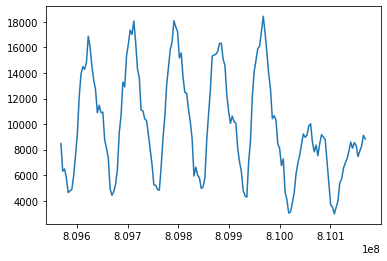

In [25]:
plt.plot(df_H_date, df_H_count)

In [31]:
df_M_date = (pd.to_datetime(df_log_line_data_by_min["date"])).array.reshape(-1, 1)
df_M_count = df_log_line_data_by_min["count"].array.reshape(-1, 1)

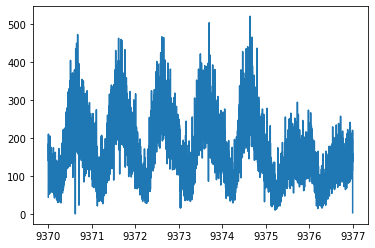

In [32]:
plt.plot(df_M_date, df_M_count)

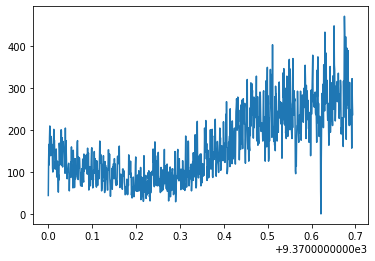

In [34]:
plt.plot(df_M_date[:1000], df_M_count[:1000])